In [206]:
import pandas as pd
import tensorflow as tf
import os 

In [207]:
df = pd.read_csv('reviews.csv') 
df.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z


In [208]:
df.isnull().sum()

ReviewId           0
RecipeId           0
AuthorId           0
AuthorName         0
Rating             0
Review           214
DateSubmitted      0
DateModified       0
dtype: int64

In [209]:
df = df.dropna(subset=['Review'])
df.isnull().sum()

ReviewId         0
RecipeId         0
AuthorId         0
AuthorName       0
Rating           0
Review           0
DateSubmitted    0
DateModified     0
dtype: int64

In [210]:
df['cleaned_reviews'] = df['Review'].str.lower()

In [211]:
df['cleaned_reviews'].head()

0         better than any you can get at a restaurant!
1    i cut back on the mayo, and made up the differ...
2    i think i did something wrong because i could ...
3    easily the best i have ever had.  juicy flavor...
4                                   an excellent dish.
Name: cleaned_reviews, dtype: object

In [212]:
df['cleaned_reviews'] = df['cleaned_reviews'].str.replace('[^\w\s]','') 
df['cleaned_reviews'].head() 


/tmp/ipykernel_2954746/3349767945.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleaned_reviews'] = df['cleaned_reviews'].str.replace('[^\w\s]','')


0          better than any you can get at a restaurant
1    i cut back on the mayo and made up the differe...
2    i think i did something wrong because i could ...
3    easily the best i have ever had  juicy flavorf...
4                                    an excellent dish
Name: cleaned_reviews, dtype: object

In [213]:
import nltk
from nltk.corpus import stopwords 

In [214]:
# nltk.download('stopwords')

In [215]:
stop_words = stopwords.words('english')

In [216]:
def remove_sw(text):
    filtered_words = []
    for x in text: 
        if x not in stop_words:
            filtered_words.append(x)
    
    return filtered_words 

In [217]:
df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: x.split(" "))
df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: remove_sw(x))

In [218]:
df['cleaned_reviews'].head()

0                            [better, get, restaurant]
1    [cut, back, mayo, made, difference, sour, crea...
2    [think, something, wrong, could, taste, cornst...
3    [easily, best, ever, , juicy, flavorful, dry, ...
4                                    [excellent, dish]
Name: cleaned_reviews, dtype: object

In [219]:
import numpy as np 

df['is_positive'] = np.where(df['Rating']<3, 0, 1) 

df[['cleaned_reviews','is_positive']]

,cleaned_reviews,is_positive
0,"[better, get, restaurant]",1
1,"[cut, back, mayo, made, difference, sour, crea...",1
2,"[think, something, wrong, could, taste, cornst...",0
3,"[easily, best, ever, , juicy, flavorful, dry, ...",1
4,"[excellent, dish]",1
...,...,...
1401977,"[disappointed, couldnt, wait, make, husband, b...",0
1401978,"[nothing, drain, dont, heat, liquids, put, mil...",1
1401979,"[good, base, recipe, someone, start, quadruple...",1
1401980,"[thank, much, amazing, recipe, lived, kenai, s...",1


In [220]:
df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: list(filter(None,x)))
        

max_word = max(df.cleaned_reviews, key=len) 
len(max_word)

# import urllib.request 

# url = 'https://nlp.stanford.edu/data/glove.6B.zip'
# filename = 'glove.6b.zip'
# urllib.request.urlretrieve(url,filename)

661

In [221]:
df = df[df.cleaned_reviews.str.len() < 100]

max_word = max(df.cleaned_reviews, key=len) 
len(max_word)

# import zipfile 

# with zipfile.ZipFile('glove.6b.zip', 'r') as zip: 
#     zip.extractall()

99

In [222]:
# word_vectors = dict()

# def add_wordvector(dict, filename):
#     with open(filename, 'r', encoding='utf8') as f:
#         for line in f.readlines():
#             line = line.split(' ')

#             try:
#                 if line[0] not in stop_words:
#                     dict[line[0]] = np.array(line[1:], dtype=float)
#             except:
#                 continue 

def add_wordvector(filename):
    with open(filename, 'r', encoding='utf8') as f:
        wordToGloveVector = {}
        wordToIndex = {}
        indexToWord = {}
        
        
        for line in f.readlines():
            line = line.split(' ')

            try:
                if line[0] not in stop_words:
                    wordToGloveVector[line[0]] = np.array(line[1:], dtype=float)
            except:
                continue
                
        tokens = sorted(wordToGloveVector.keys())
        for i, word in enumerate(tokens):
            kerasIdx = i + 1 # 0 is reserved for masking n Keras 
            wordToIndex[word] = kerasIdx 
            indexToWord[kerasIdx] = word 
            
    return wordToGloveVector, wordToIndex, indexToWord
            
wordToGloveVector, wordToIndex, indexToWord = add_wordvector('glove.6B.50d.txt')
len(stop_words)

179

In [223]:
len(wordToGloveVector)

wordToGloveVector['good'] 

array([-3.5586e-01,  5.2130e-01, -6.1070e-01, -3.0131e-01,  9.4862e-01,
       -3.1539e-01, -5.9831e-01,  1.2188e-01, -3.1943e-02,  5.5695e-01,
       -1.0621e-01,  6.3399e-01, -4.7340e-01, -7.5895e-02,  3.8247e-01,
        8.1569e-02,  8.2214e-01,  2.2220e-01, -8.3764e-03, -7.6620e-01,
       -5.6253e-01,  6.1759e-01,  2.0292e-01, -4.8598e-02,  8.7815e-01,
       -1.6549e+00, -7.7418e-01,  1.5435e-01,  9.4823e-01, -3.9520e-01,
        3.7302e+00,  8.2855e-01, -1.4104e-01,  1.6395e-02,  2.1115e-01,
       -3.6085e-02, -1.5587e-01,  8.6583e-01,  2.6309e-01, -7.1015e-01,
       -3.6770e-02,  1.8282e-03, -1.7704e-01,  2.7032e-01,  1.1026e-01,
        1.4133e-01, -5.7322e-02,  2.7207e-01,  3.1305e-01,  9.2771e-01])

In [224]:
wordToIndex['good']

164285

In [225]:
from nltk.stem import WordNetLemmatizer

# nltk.download('wordnet')
# nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

In [226]:
def lemmatize_token(text):
    lemmatized_token = [lemmatizer.lemmatize(x) for x in text] 
    useful_token = [x for x in lemmatized_token if x in wordToGloveVector]

    return useful_token 

word_token = df['cleaned_reviews'][0] 

lemmatize_token(word_token)


['better', 'get', 'restaurant']

In [227]:
def text_to_vector(text, token_dict=wordToGloveVector):
    processed_token = lemmatize_token(text)

    vectors = []

    for x in processed_token:
        if x not in wordToGloveVector:
            continue 
        
        vectors.append(token_dict[x]) 

    return np.array(vectors, dtype=float) 

def text_to_indices(text):
    processed_token = lemmatize_token(text)
    
    wordToIndices = []
    
    for x in processed_token:
        if x not in wordToGloveVector:
            continue 
        
        wordToIndices.append(wordToIndex[x])
        
        
    return np.array(wordToIndices, dtype=int)


    

In [228]:
# def vectorize_review(df):
#     label = df['is_positive'].to_numpy().astype(int)

#     vectorized_text = []

#     for text in df['cleaned_reviews']:
#         text_as_vector = text_to_vector(text) 

#         if text_as_vector.shape[0] == 0:
#             text_as_vector = np.zeros(shape=(1,50)) 

#         vectorized_text.append(text_as_vector)

#     return vectorized_text, label

def map_input_output(df):
    label = df['is_positive'].to_numpy().astype(int)

    input_text = []

    for text in df['cleaned_reviews']:
#         text_as_indices = text_to_indices(text)
    
#         if text_as_indices.shape[0] == 0:
#             text_as_indices = np.zeros(shape=(1))

        processed_token = lemmatize_token(text)
        
#         if len(processed_token) == False:
#             processed_token = np.zeros(shape=(1)) 

        input_text.append(processed_token)
        
    return input_text, label

In [229]:
train_df = df.sample(frac=1, random_state=1)
train_df.reset_index(drop=True, inplace=True) 

split_index_1 = int(len(train_df) * 0.7)
split_index_2 = int(len(train_df) * 0.85)

train_df, val_df, test_df = train_df[:split_index_1], train_df[split_index_1:split_index_2], train_df[split_index_2:]

len(train_df), len(val_df), len(test_df)

(973560, 208620, 208621)

In [230]:
x_train, y_train = map_input_output(train_df) 

len(x_train), len(x_train[0]), len(x_train[1])

(973560, 18, 14)

In [231]:
token_len = []

for i in range (len(x_train)):
    token_len.append(len(x_train[i])) 

pd.Series(token_len).describe()

count    973560.000000
mean         25.128445
std          16.213132
min           0.000000
25%          13.000000
50%          22.000000
75%          33.000000
max          99.000000
dtype: float64

In [232]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)

words_to_index = tokenizer.word_index

# words_to_index

In [233]:
# x_train_indices = tokenizer.texts_to_sequences(x_train)

# x_train_indices

# wordToIndex['recipe']

In [234]:
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding

def createPretrainedEmbeddingLayer(wordToGloveVector, wordIndex):
    vocabLen = len(wordIndex) + 1 
    embDim = 50
    
    embeddingMatrix = np.zeros((vocabLen, embDim)) 
    for word, index in wordIndex.items():
        embeddingMatrix[index, :] = wordToGloveVector[word]
        
    embeddingLayer = Embedding(vocabLen, embDim, input_length=100, embeddings_initializer=tf.keras.initializers.Constant(embeddingMatrix), trainable=False)
    
    return embeddingLayer 

In [235]:
gloveEmbeddingLayer = createPretrainedEmbeddingLayer(wordToGloveVector, words_to_index)

wordToGloveVector['easy']

array([-2.3259e-02, -1.0774e-01,  1.9567e-01,  3.3223e-02,  7.4798e-02,
       -2.4640e-01, -3.7363e-01,  2.3737e-01, -4.3820e-02,  7.5206e-01,
       -6.8002e-01,  1.4228e-01, -5.1052e-02,  1.2944e-01,  6.1359e-02,
        1.3980e-01,  6.7984e-01, -5.8867e-01,  1.1884e-01, -1.0120e+00,
       -4.2694e-01,  1.5890e-01, -7.4903e-02,  5.3789e-01,  1.0589e+00,
       -1.3319e+00, -3.8969e-01,  8.3434e-02,  1.2894e+00, -7.9956e-01,
        3.0825e+00,  3.7201e-01, -4.9131e-01,  1.5977e-01,  4.3779e-01,
        1.2637e-01,  1.1982e-01,  9.9909e-01, -2.4347e-01, -7.7499e-01,
        4.7008e-01,  1.7949e-01,  2.6817e-01,  6.6041e-01,  2.0982e-01,
        3.2454e-01,  6.6948e-01, -2.9127e-03,  6.3353e-01,  5.2693e-01])

In [236]:
len(x_train[1133])

0

In [237]:
# x_train = tokenizer.texts_to_sequences(x_train)

# x_train

x_train[0]

['recipe',
 'us',
 '1',
 'cup',
 'cornflakes',
 'instead',
 '2',
 '12',
 'cup',
 'flour',
 'shortening',
 'cut',
 'flour',
 'right',
 'good',
 'lol',
 'thank',
 'posting']

In [238]:
x_train = tokenizer.texts_to_sequences(x_train)

x_train = tf.keras.utils.pad_sequences(x_train, maxlen=100, dtype='float32', padding='post') 

x_train.shape
# tf.keras.utils.pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], dtype='float32', padding='post')

(973560, 100)

In [283]:
len(x_train[0]), len(x_train[1]) 

x_train[0]

array([2.500e+01, 1.000e+00, 2.600e+01, 3.224e+03, 4.110e+02, 4.280e+02,
       4.000e+00, 4.000e+01, 9.100e+01, 3.900e+01, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [240]:
y_train.shape  


(973560,)

In [241]:
x_val, y_val = map_input_output(val_df)

x_val = tokenizer.texts_to_sequences(x_val)

x_val = tf.keras.utils.pad_sequences(x_val, maxlen=100, dtype='float32', padding='post')

x_val.shape, y_val.shape

((208620, 100), (208620,))

In [242]:
x_test, y_test = map_input_output(test_df)

x_test = tokenizer.texts_to_sequences(x_test)

x_test = tf.keras.utils.pad_sequences(x_test, maxlen=100, dtype='float32', padding='post')

x_test.shape, y_test.shape 

((208621, 100), (208621,))

# MODEL TRAINING

In [243]:
class_freq = pd.value_counts(train_df['is_positive']) 
class_freq

1    897210
0     76350
Name: is_positive, dtype: int64

In [244]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
x_train, y_train = rus.fit_resample(x_train,y_train) 

In [385]:
from collections import Counter

Counter(y_train)

Counter({0: 76350, 1: 76350})

In [246]:
weights = {0: class_freq.sum() / (class_freq[0] * 2), 1: class_freq.sum() / (class_freq[1] * 2)}   #model1

# weights = {0: class_freq.sum() / class_freq[0], 1: class_freq.sum() / class_freq[1] } #model2

# weights = {0: (class_freq.sum() / (class_freq[0]))+3, 1: class_freq.sum() / (class_freq[1])} #model3

weights 

{0: 6.375638506876228, 1: 0.5425485672250644}

In [336]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import AUC 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import keras_tuner
from keras_tuner import BayesianOptimization

def build_lstm(hp):
#     activation = hp.Choice('activation', 
#                         [
#                           'relu',
#                           'tanh'
# #                           'linear',
# #                           'selu',
# #                           'elu'
#                         ])

#     num_rnn_layers = hp.Int(
#                         'num_rnn_layers', 
#                         min_value=0,
#                         max_value=12,
#                         default=3)

    recurrent_dropout = hp.Float(
                        'recurrent_dropout', 
                        min_value=0.0,
                        max_value=0.8,
                        default=0.2,
                        step=0.05)
    num_units = hp.Int(
                        'num_units', 
                        min_value=46,
                        max_value=500,
                        default=68)
    dropout = hp.Float(
                        'dropout', 
                        min_value=0.0,
                        max_value=0.8,
                        step=0.05)
    
    
    model = Sequential([])
    model.add(gloveEmbeddingLayer)
    model.add(layers.SimpleRNN(units=num_units, dropout = dropout,recurrent_dropout = recurrent_dropout, return_sequences=True))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss=BinaryCrossentropy(), metrics=['accuracy', AUC(name='auc')], optimizer=Adam(
      hp.Choice('learning_rate', values=[0.001, 0.0001])))

# loss='binary_crossentropy'

#     model.compile(
#       optimizer=keras.optimizers.Adam(
#       hp.Float(
#         'learning_rate',
#         min_value=1e-10,
#         max_value=1e-2,
#         sampling='LOG',
#         default=1e-6
#             ),

#         )
#     )
    return model

# keras_tuner.Objective('val_auc', direction="max")

# bayesian_opt_tuner = BayesianOptimization(
#     build_lstm,
#     objective= "val_loss",
#     max_trials=5,
#     executions_per_trial=1,
#     directory=os.path.normpath('keras_tuning_gru_extend/'),
#     project_name='kerastuner_bayesian_poc',
#     overwrite=True)
# n_epochs=15

# bayesian_opt_tuner.search(x_train, y_train,epochs=n_epochs,
#      batch_size=128,
#      validation_data=(x_val, y_val),
#      validation_split=0.2,verbose=1,
#         callbacks=[EarlyStopping(monitor="val_loss", 
#                               patience=3,
#                               verbose=1,
#                               restore_best_weights=True)])

# bayes_opt_model_best_model = bayesian_opt_tuner.get_best_models(num_models=5)  


# bayesian_opt_tunerLSTM = BayesianOptimization(
#     build_lstm,
#     objective= "val_loss",
#     max_trials=5,
#     executions_per_trial=1,
#     directory=os.path.normpath('keras_tuning_lstm_extend/'),
#     project_name='kerastuner_bayesian_poc',
#     overwrite=True)
# n_epochs=15

# bayesian_opt_tunerLSTM.search(x_train, y_train,epochs=n_epochs,
#      batch_size=128,
#      validation_data=(x_val, y_val),
#      validation_split=0.2,verbose=1,
#         callbacks=[EarlyStopping(monitor="val_loss", 
#                               patience=3,
#                               verbose=1,
#                               restore_best_weights=True)])

# bayes_opt_model_best_modelLSTM = bayesian_opt_tunerLSTM.get_best_models(num_models=5) 

bayesian_opt_tunerRNN = BayesianOptimization(
    build_lstm,
    objective= "val_loss",
    max_trials=5,
    executions_per_trial=1,
    directory=os.path.normpath('keras_tuning_rnn_extend/'),
    project_name='kerastuner_bayesian_poc',
    overwrite=True)
n_epochs=15

bayesian_opt_tunerRNN.search(x_train, y_train,epochs=n_epochs,
     batch_size=128,
     validation_data=(x_val, y_val),
     validation_split=0.2,verbose=1,
        callbacks=[EarlyStopping(monitor="val_loss", 
                              patience=3,
                              verbose=1,
                              restore_best_weights=True)])

bayes_opt_model_best_modelRNN = bayesian_opt_tunerRNN.get_best_models(num_models=5) 

Trial 5 Complete [00h 23m 29s]
val_loss: 0.38868603110313416

Best val_loss So Far: 0.37166348099708557
Total elapsed time: 01h 37m 02s
INFO:tensorflow:Oracle triggered exit


In [369]:
# model = bayes_opt_model_best_model[0] 
# best_hps = bayesian_opt_tuner.get_best_hyperparameters()[0]

# # best_hps.values, model.summary()

# bayesian_opt_tuner.results_summary()  
###############################################
# modelLSTM = bayes_opt_model_best_modelLSTM[0] 
# best_hpsLSTM = bayesian_opt_tunerLSTM.get_best_hyperparameters()[0]

# # best_hpsLSTM.values, modelLSTM.summary()

bayesian_opt_tunerLSTM.results_summary()  
###############################################
# modelRNN = bayes_opt_model_best_modelRNN[0] 
# best_hpsRNN = bayesian_opt_tunerRNN.get_best_hyperparameters()[0]

# # best_hpsRNN.values, modelRNN.summary()

# bayesian_opt_tunerRNN.results_summary()  



Results summary
Results in keras_tuning_lstm_extend/kerastuner_bayesian_poc
Showing 10 best trials
Trial summary
Hyperparameters:
recurrent_dropout: 0.0
num_units: 500
dropout: 0.2
learning_rate: 0.0001
Score: 0.45189979672431946
Trial summary
Hyperparameters:
recurrent_dropout: 0.0
num_units: 500
dropout: 0.2
learning_rate: 0.001
Score: 0.4664074778556824
Trial summary
Hyperparameters:
recurrent_dropout: 0.0
num_units: 301
dropout: 0.6499999999999999
learning_rate: 0.001
Score: 0.4691464304924011
Trial summary
Hyperparameters:
recurrent_dropout: 0.0
num_units: 46
dropout: 0.2
learning_rate: 0.001
Score: 0.4705818295478821
Trial summary
Hyperparameters:
recurrent_dropout: 0.75
num_units: 215
dropout: 0.5999999999999999
learning_rate: 0.0001
Score: 0.4778195023536682


In [370]:
# modelRNN2 = bayes_opt_model_best_modelRNN[1] 
# modelRNN2.summary()

# model = bayes_opt_model_best_model[1] 
# model.summary()

# modelGRU2 = bayes_opt_model_best_model[4] 
# modelGRU2.summary()

# modelGRU3 = bayes_opt_model_best_model[3] 
# modelGRU3.summary()

# modelGRU = bayes_opt_model_best_model[0] 
# modelGRU.summary()

# modelLSTM2 = bayes_opt_model_best_modelLSTM[4] 
# modelLSTM2.summary()

modelLSTM3 = bayes_opt_model_best_modelLSTM[0] 
modelLSTM3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           2268750   
                                                                 
 lstm (LSTM)                 (None, 100, 500)          1102000   
                                                                 
 flatten (Flatten)           (None, 50000)             0         
                                                                 
 dense (Dense)               (None, 1)                 50001     
                                                                 
Total params: 3,420,751
Trainable params: 1,152,001
Non-trainable params: 2,268,750
_________________________________________________________________


In [371]:

# histGRU = modelGRU.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=15)

# histGRU2 = modelGRU2.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=15)

# histGRU3 = modelGRU2.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=64, epochs=30)

# histLSTM = model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=15)

# histLSTM2 = model.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=64, epochs=30)

# histRNN = modelRNN.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=15)

# histRNN2 = modelRNN2.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=15)

##########################

# histGRU_extended = modelGRU.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=64, epochs=30)

# histGRU_extended2 = modelGRU2.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=64, epochs=30)

# histGRU_extended3 = modelGRU3.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=64, epochs=30)

# histGRU_ES = model.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=128, epochs=30, 
#                        callbacks=[EarlyStopping(monitor="val_accuracy", 
#                               patience=4,
#                               verbose=1,
#                               restore_best_weights=True)])


# histLSTM_ES = modelLSTM.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=128, epochs=30, 
#                        callbacks=[EarlyStopping(monitor="val_accuracy", 
#                               patience=4,
#                               verbose=1,
#                               restore_best_weights=True)])

# histGRU2_ES = modelGRU2.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=128, epochs=30, 
#                        callbacks=[EarlyStopping(monitor="val_accuracy", 
#                               patience=4,
#                               verbose=1,
#                               restore_best_weights=True)])

#######################################

# histGRU3_ES = modelGRU.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=128, epochs=30, 
#                        callbacks=[EarlyStopping(monitor="val_loss", 
#                               patience=4,
#                               verbose=1,
#                               restore_best_weights=True)])

# histRNN_ES = modelRNN.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=128, epochs=30, 
#                        callbacks=[EarlyStopping(monitor="val_loss", 
#                               patience=4,
#                               verbose=1,
#                               restore_best_weights=True)])

histLSTM2_ES = modelLSTM3.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=128, epochs=30, 
                       callbacks=[EarlyStopping(monitor="val_loss", 
                              patience=4,
                              verbose=1,
                              restore_best_weights=True)])





Epoch 1/30
1193/1193 [==============================] - 685s 574ms/step - loss: 0.4810 - accuracy: 0.7606 - auc: 0.8452 - val_loss: 0.4720 - val_accuracy: 0.8161 - val_auc: 0.8299
Epoch 2/30
1193/1193 [==============================] - 682s 572ms/step - loss: 0.4785 - accuracy: 0.7623 - auc: 0.8466 - val_loss: 0.5560 - val_accuracy: 0.7565 - val_auc: 0.8303
Epoch 3/30
1193/1193 [==============================] - 681s 571ms/step - loss: 0.4763 - accuracy: 0.7636 - auc: 0.8483 - val_loss: 0.4661 - val_accuracy: 0.8162 - val_auc: 0.8310
Epoch 4/30
1193/1193 [==============================] - 682s 572ms/step - loss: 0.4729 - accuracy: 0.7664 - auc: 0.8506 - val_loss: 0.4831 - val_accuracy: 0.8171 - val_auc: 0.8311
Epoch 5/30
1193/1193 [==============================] - 682s 572ms/step - loss: 0.4702 - accuracy: 0.7671 - auc: 0.8527 - val_loss: 0.5160 - val_accuracy: 0.7834 - val_auc: 0.8305
Epoch 6/30
1193/1193 [==============================] - 682s 571ms/step - loss: 0.4670 - accuracy: 0

In [404]:
# modelGRU.save('gru_embed.h5')
modelGRU.save('gru_embed_tuned_valloss_ext_last.h5')

# MODEL EVALUATION

In [409]:
from tensorflow.keras.models import load_model 

# best_model = load_model('modelgru_embed2/') 

best_model = load_model('lstm_embed_tuned_valloss_ext2.h5') 

# model_zero = load_model('lstm_embed_tuned_zerodropout.h5') 

# model_rnn = load_model('lstm_embed_tuned_zerodropout.h5')
# best_modelrnn = load_model('modelrnn/')

# best_modelgru = load_model('modelgru/')

In [410]:
test_predictions = (best_model.predict(x_test) > 0.5)
# pred_zero = (model_zero.predict(x_test) > 0.5)

from sklearn.metrics import classification_report, auc, roc_curve

print(classification_report(y_test, test_predictions))

6520/6520 [==============================] - 446s 68ms/step
              precision    recall  f1-score   support

           0       0.26      0.65      0.37     16399
           1       0.97      0.84      0.90    192222

    accuracy                           0.83    208621
   macro avg       0.61      0.75      0.63    208621
weighted avg       0.91      0.83      0.86    208621



In [411]:
best_model.evaluate(x_test, y_test)

6520/6520 [==============================] - 448s 69ms/step - loss: 0.4472 - accuracy: 0.8255 - auc: 0.8292


[0.44720810651779175, 0.825520932674408, 0.8292137980461121]

In [394]:
import matplotlib.pyplot as plt

pred_rnn = modelRNN.predict(x_test)
pred_gru = modelGRU.predict(x_test)
pred_lstm = modelLSTM3.predict(x_test)

6520/6520 [==============================] - 448s 69ms/step


In [396]:
from sklearn.metrics import roc_auc_score

fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(y_test, pred_rnn)
auc_rnn = roc_auc_score(y_test, pred_rnn)
# auc(fpr_rnn, tpr_rnn)

fpr_gru, tpr_gru, thresholds_gru = roc_curve(y_test, pred_gru)
auc_gru = roc_auc_score(y_test, pred_gru)
# auc(fpr_gru, tpr_gru)

fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_test, pred_lstm)
auc_lstm = roc_auc_score(y_test, pred_lstm)
# auc(fpr_lstm, tpr_lstm)

In [52]:
# fpr_zero, tpr_zero, thresholds_zero = roc_curve(y_test, pred_zero)
# auc_zero = auc(fpr_zero,tpr_zero)

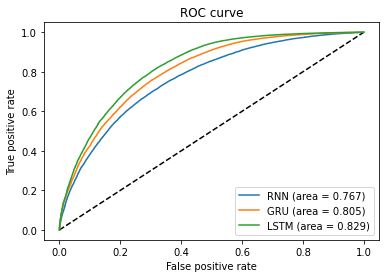

In [397]:
# best_model.summary()
# model.save('lstm_embed_tuned_zerodropout.h5')

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (area = {:.3f})'.format(auc_rnn))
plt.plot(fpr_gru, tpr_gru, label='GRU (area = {:.3f})'.format(auc_gru))
plt.plot(fpr_lstm, tpr_lstm, label='LSTM (area = {:.3f})'.format(auc_lstm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
# plt.figure(2)
# plt.xlim(0, 0.2)
# plt.ylim(0.8, 1)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_zero, tpr_zero, label='RF (area = {:.3f})'.format(auc_zero))
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve (zoomed in at top left)')
# plt.legend(loc='best')
# plt.show()

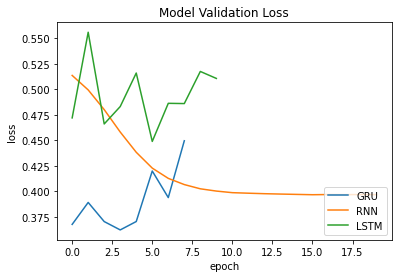

In [382]:
plt.plot(histGRU3_ES.history['val_loss'])
plt.plot(histRNN_ES.history['val_loss'])
plt.plot(histLSTM2_ES.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['GRU', 'RNN', 'LSTM'], loc='lower right')
plt.show()


In [69]:
# model2 = load_model('model2/')

In [67]:
# model2.summary()

In [51]:
# model_embed = load_model('model_embed/')

In [66]:
# model_embed.summary()

In [45]:
input_text = x_test[0]
input_array = input_text[np.newaxis, :] 

input_array.shape

(1, 100)

In [46]:
best_model.predict(input_array)

1/1 [==============================] - 0s 194ms/step


array([[0.77509093]], dtype=float32)

In [51]:
tf.keras.__version__

'2.9.0'

In [58]:
# model = Sequential([])

# # model.add(layers.Input(shape=(100,50))) 
# model.add(gloveEmbeddingLayer)
# model.add(layers.LSTM(460, return_sequences=True))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.summary()

In [61]:
# modelGRU = Sequential([])

# # modelGRU.add(layers.Input(shape=(100,50)))
# modelGRU.add(gloveEmbeddingLayer)
# modelGRU.add(layers.GRU(46, return_sequences=True))
# modelGRU.add(layers.Dropout(0.2))
# modelGRU.add(layers.Flatten())
# modelGRU.add(layers.Dense(1, activation='sigmoid')) 

# modelGRU.summary()

In [345]:
model_RNN_Lone = Sequential([])

# modelRNN.add(layers.Input(shape=(100,50)))
model_RNN_Lone.add(gloveEmbeddingLayer)
model_RNN_Lone.add(layers.SimpleRNN(146, dropout = 0.2, return_sequences=True))
# modelRNN.add(layers.SimpleRNN(68)) 
model_RNN_Lone.add(layers.Flatten())
model_RNN_Lone.add(layers.Dense(1, activation='sigmoid')) 

# modelRNN.summary()

In [346]:
# model_cp = ModelCheckpoint('model_embed_reludense/', save_best_only=True)
# model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(), metrics=['accuracy', AUC(name='auc')]) 

# modelrnn_cp = ModelCheckpoint('modelrnn_embed/', save_best_only=True)
model_RNN_Lone.compile(optimizer=Adam(learning_rate=0.0001), loss=BinaryCrossentropy(), metrics=['accuracy', AUC(name='auc')])

# modelgru_cp = ModelCheckpoint('modelgru_embed2/', save_best_only=True)
# modelGRU.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(), metrics=['accuracy', AUC(name='auc')])


In [350]:
# model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=15, callbacks=[model_cp], class_weight=weights) 

# modelRNN.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=15, callbacks=[modelrnn_cp], class_weight=weights) 

# modelGRU.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=15, callbacks=[modelgru_cp], class_weight=weights) 

histRNN_ES_Lone = model_RNN_Lone.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=128, epochs=30, 
                       callbacks=[EarlyStopping(monitor="val_loss", 
                              patience=4,
                              verbose=1,
                              restore_best_weights=True)])

Epoch 1/30
1193/1193 [==============================] - 73s 61ms/step - loss: 0.5416 - accuracy: 0.7231 - auc: 0.8001 - val_loss: 0.5612 - val_accuracy: 0.7071 - val_auc: 0.8038
Epoch 2/30
1193/1193 [==============================] - 73s 61ms/step - loss: 0.5375 - accuracy: 0.7264 - auc: 0.8037 - val_loss: 0.5229 - val_accuracy: 0.7430 - val_auc: 0.8058
Epoch 3/30
1193/1193 [==============================] - 73s 61ms/step - loss: 0.5359 - accuracy: 0.7273 - auc: 0.8048 - val_loss: 0.5490 - val_accuracy: 0.7208 - val_auc: 0.8066
Epoch 4/30
1193/1193 [==============================] - 73s 61ms/step - loss: 0.5339 - accuracy: 0.7292 - auc: 0.8067 - val_loss: 0.4816 - val_accuracy: 0.7755 - val_auc: 0.8083
Epoch 5/30
1193/1193 [==============================] - ETA: 0s - loss: 0.5322 - accuracy: 0.7295 - auc: 0.8080

KeyboardInterrupt: 

In [58]:
# modelRNN.save('rnn_embed_tuned_2.h5')